Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Akshaj Kammari"
COLLABORATORS = "you.com"

---

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [2]:
NAME = ""
COLLABORATORS = ""

---

<div class="alert alert-block alert-info">
<h3>Student Information</h3> Please provide information about yourself.<br>
<b>Name</b> Akshaj Kammari<br>
<b>NetID</b>: ak1990<br>
<b>Recitation (1,2,3,4)</b>: 2<br>
<b>Notes to Grader</b> (optional):<br>
<br><br>
<b>IMPORTANT</b>
Your work will not be graded withour your initials below<br>
I certify that this lab represents my own work and I have read the 
RU academic intergrity policies at <br>  http://nbacademicintegrity.rutgers.edu/home/for-students/
<br>
<b>Initials</b>:   ak   (eg: AG for Andy Guna)


<h3>Grader Notes</h3>
<b>Your Grade<b>:<br>
<b>Grader Initials</b>:<br>
<b>Grader Comments</b> (optional):<br>
</div>

## CS 439 - Introduction to Data Science
### Fall 2023

# Lab 2: Processing and analyzing large data sets

### Due Date : Sunday October 8, 2023 by 11:59 PM

### Instructions


This is lab on using Python/Pandas to process large data sets to discover information about the data set. The purpose of this lab is to learn how to use some basic commands in Pandas in your data science projects. We will also do some data analysis with a real dataset of babynames. This lab is presented as a Jupyter notebook. 
Please execute the cells (SHIFT-ENTER) that are already completed and then your task is to fill in the missing code.


[Pandas](https://pandas.pydata.org/) is one of the most widely used Python libraries in data science. In this lab, you will learn commonly used data wrangling operations/tools in Pandas. We aim to give you familiarity with:

* Creating dataframes
* Slicing data frames (ie. selecting rows and columns)
* Filtering data (using boolean arrays)
* Data Aggregation/Grouping dataframes
* Merging dataframes

In this lab, you are going to use several pandas methods like `drop()`, `loc[]`, `groupby()`. You may press `shift+tab` on the method parameters to see the documentation for that method.

**A note**: Pandas operations can be confusing at times and the documentation may not be that great, but it is OK to be stumped when figuring out why a piece of code is not doing what it's supposed to. We don't expect you to memorize all the different Pandas functions for any reason, just know the basic ones like `iloc[]`, `loc[]`, slicing, and other general dataframe operations. For exams and quizzes, you will get a Pandas cheat sheet that can be used.

Throughout the semester, you will have to search through Pandas documentation and experiment, but remember it is part of the learning experience and will help shape you as a data scientist!  You need to learn how to read documentation.

### Validation of Code/notebooks
Although there is the option to validate a cell/notebook using "validate" option in nbgrader, we are <b>NOT</b> using that feature
when grading. Graders run the cells and observe to validate output. Hence it is <b>NOT necessary</b> to validate notebooks.

### Missing Files/Output/Questions/Clarifications
In some cases, files or output may be missing from the released version. Please check Canvas files and discussions. Please post questions to canvas discussions. We are not responding to email questions. For private questions, please attend a scheduled office hours from staff as listed on canvas.

## Setup
The first step in this lab is to setup the environment. We will read in pandas, numpy and matplotlib

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Creating DataFrames & Basic Manipulations

A [dataframe](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe) is a two-dimensional labeled data structure with columns of potentially different types.

The pandas [`DataFrame` function](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) provides at least two syntaxes to create a data frame.

**Syntax 1: ** You can create a data frame by specifying the columns and values using a dictionary as shown below. 

The keys of the dictionary are the column names, and the values of the dictionary are lists containing the row entries.

In [4]:
president_info = pd.DataFrame(
    data={'president': ['obama', 'bush', 'trump', 'biden'],
          'party': ['democrat', 'republican', 'republican', 'democrat']
          })
president_info

,president,party
0,obama,democrat
1,bush,republican
2,trump,republican
3,biden,democrat


**Syntax 2: ** You can also define a dataframe by specifying the rows like below. 

Each row corresponds to a distinct tuple, and the columns are specified separately.

In [5]:
president_info = pd.DataFrame(
    [("obama", "democrat"), ("bush", "republican"), ("trump", "republican"),
     ("biden", "democrat")], 
    columns = ["president", "party"])
president_info

,president,party
0,obama,democrat
1,bush,republican
2,trump,republican
3,biden,democrat


# Task 1 - Panda Basics

### Activity 1.1 - adding columns

You can add a column by `dataframe['new column name'] = [data]`. Please add a column called `votes` to the `president_info` table which contains a 52%,49%,46%, or 51% based on your personal preference ordering for each fruit. 


In [6]:
# YOUR CODE HERE
president_info['votes'] = ["49%", "52%", "46%", "51%"] 
#raise NotImplementedError()

In [7]:
# print the data frame to see if the column has been added
president_info

,president,party,votes
0,obama,democrat,49%
1,bush,republican,52%
2,trump,republican,46%
3,biden,democrat,51%


In [8]:
# insert a new row for any president other than the one listed here. You can make up one.
# YOUR CODE HERE

row4 = pd.Series({"president": "washington", "party": "democrat", "votes": "100%"})
president_info.loc[len(president_info)] = row4

# raise NotImplementedError()
president_info

,president,party,votes
0,obama,democrat,49%
1,bush,republican,52%
2,trump,republican,46%
3,biden,democrat,51%
4,washington,democrat,100%


In [9]:
# complete the ?? of the assert statements below by observing the values
assert president_info["votes"].dtype == object
assert len(president_info["votes"].dropna()) == 5
### ENDOF SOLUTION

In [10]:
# complete the assert statements below
#assert president_info["votes"].dtype == 
assert len(president_info["votes"].dropna()) == 5
### ENDOF SOLUTION

### Activity 1.2 - adding columns II

You can ALSO add a column by `dataframe.loc[:, 'new column name'] = [data]`. This way to modify an existing dataframe is preferred over the assignment above. In other words, it is best that you use `loc[]`. Although using `loc[]` is more verbose, it is faster. (However, this tradeoff is more likely to be valuable in production software than during interactive use.) In lecture we will explain in more detail what `loc[]` does, but essentially, the first parameter is for the rows and second is for columns. The `:` means keep all rows and the `new column name` indicates the column you are modifying or in this case adding. 

Please add a column called `rank` to the `president_info` table which contains a 1,2,3,4,5 or based on your personal preference ordering for each president (it is perfectly fine to be random here). Use the loc to do this.


In [11]:
# YOUR CODE HERE
president_info.loc[:, 'rank'] = [2, 3, 1, 4, 5]

#raise NotImplementedError()

In [12]:
president_info

,president,party,votes,rank
0,obama,democrat,49%,2
1,bush,republican,52%,3
2,trump,republican,46%,1
3,biden,democrat,51%,4
4,washington,democrat,100%,5


In [13]:
# complete the assert statements below
assert president_info["rank"].dtype == int
assert len(president_info["rank"].dropna()) == 5

### Activity 1.3 - dropping columns

Use the `.drop()` method to [drop](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html) the both the `votes` and `rank` columns you created and make a new dataFrame called president_info_new. (Make sure to use the `axis` parameter correctly) 

Hint: Look through the documentation to see how you can drop multiple columns of a Pandas dataframe at once, it may involve a list.

In [14]:
# YOUR CODE HERE
president_info_new = president_info.drop(['votes', 'rank'], axis=1)
#raise NotImplementedError()

In [15]:
president_info_new

,president,party
0,obama,democrat
1,bush,republican
2,trump,republican
3,biden,democrat
4,washington,democrat


In [16]:
# complete the assert statements below
assert president_info_new.shape[1] == 2

### Activity 1.4 - Renaming columns

Use the `.rename()` method to [rename](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html) the columns of `president_info_new` so they begin with a capital letter. Set the `inplace` parameter correctly to change the `president_info_new` dataframe. (**Hint:** in 1.3, `drop` creates and returns a new dataframe instead of changing `president_info` because `inplace` by default is `False`)

In [17]:
# YOUR CODE HERE
president_info_new.rename(columns=lambda x: x.capitalize(), inplace=True)
president_info_new
#raise NotImplementedError()

,President,Party
0,obama,democrat
1,bush,republican
2,trump,republican
3,biden,democrat
4,washington,democrat


In [18]:
president_info

,president,party,votes,rank
0,obama,democrat,49%,2
1,bush,republican,52%,3
2,trump,republican,46%,1
3,biden,democrat,51%,4
4,washington,democrat,100%,5


In [19]:
# complete the assert statements below
assert president_info.columns[0] == "president"
assert president_info.columns[1] == "party"


# Task 2 - Babyname case study
Now that we have learned the basics of data frames, let's move on to a babynames dataset. The babynames data set contains babynames from all states. We will clean and wrangle a data frame with babynames data for the remainder of this task.

## Helper Function
### `fetch_and_cache` Helper

Downloading large files take time. If you have to download the file everytime you execute this notebook, things can be slow and inefficient. To do this task once, we will use the following function for downloading and caching the data in the `data/` directory and returns the `Path` to the downloaded file. We can use this function throughout the course, so that we save the download bandwidth. This function checks the local data directory for the file name, before attempting to download. Note that, going forward, we will maintain a "data" folder in our lab working folder. 

In [20]:
# Author: Berkeley Data Science Group
def fetch_and_cache(data_url, file, data_dir="data", force=False):
    """
    Download and cache a url and return the file object.
    
    data_url: the web address to download
    file: the file in which to save the results.
    data_dir: (default="data") the location to save the data
    force: if true the file is always re-downloaded 
    
    return: The pathlib.Path object representing the file.
    """
    import requests
    from pathlib import Path
    data_dir = Path(data_dir)
    data_dir.mkdir(exist_ok=True)
    file_path = data_dir/Path(file)
    if force and file_path.exists():
        file_path.unlink()
    if force or not file_path.exists():
        print('Downloading...', end=' ')
        resp = requests.get(data_url)
        with file_path.open('wb') as f:
            f.write(resp.content)
        print('Done!')
    else:
        import time 
        birth_time = time.ctime(file_path.stat().st_ctime)
        print("Using cached version downloaded:", birth_time)
    return file_path

Let us step through the above function and identify some of the key lines.

In Python, whenever you want to check if a file exists in a certain path, it is not sufficient to just have the string representation of the path, you need to create a Path object usign the `Path()` constructor. Essentially, after the Path object is created for the directory, a directory is created at that path location using the `mkdir()` method. Then, within the directory, a path for the file itself is created and if the path has already been linked (a.k.a file has already been created and put in the directory), then a new one is not created and instead uses the cached version.

The function `exists()` in the code above is one way to check if a file exists at a certain path when called on a path object. There is also another way this can be done using the `os` library in Python. If you decided to use the `os` library, you wouldn't need to create a Path object and rather pass in the the string representation of the path.

Now, going back to the code, if the path hasn't been linked, then the file is downloaded and created at the path location. 

The benefit of this function is that not only can you force when you want a new file to be downloaded using the `force` parameter, but in cases when you don't need the file to be re-downloaded, you can use the cached version and save download time.

Below we use fetch and cache to download the `namesbystate.zip` zip file. 

**This might take a little while!**

First let's run the following cells to build the dataframe `baby_names`.
The cells below download the data from the web and extract the data in a New Jersey region. There should be a total of ???  records.

## Activity 2.1-  Download Babynames Data Set
The zip file is approximately 21 MB. It might take a little time to download.But once you downloaded, it should always be available in the data folder for your lab.

In [21]:
data_url = 'https://www.ssa.gov/oact/babynames/state/namesbystate.zip'
# use fetct_and_cache to avoid multiple downloads.
namesbystate_path = fetch_and_cache(data_url, 'namesbystate.zip')

Using cached version downloaded: Wed Oct  4 19:53:48 2023


The following cell builds the final full `baby_names` DataFrame. Here is documentation for [pd.concat](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.concat.html) if you want to know more about its functionality. 


In [22]:
import zipfile
import pandas as pd
zf = zipfile.ZipFile(namesbystate_path, 'r')

field_names = ['State', 'Sex', 'Year', 'Name', 'Count']

def load_dataframe_from_zip(zf, f):
    with zf.open(f) as fh: 
        return pd.read_csv(fh, header=None, names=field_names)

# List comprehension
states = [
    load_dataframe_from_zip(zf, f)
    for f in sorted(zf.filelist, key=lambda x:x.filename) 
    if f.filename.endswith('.TXT')
]

baby_names = pd.concat(states).reset_index(drop=True)

In [23]:
# print key information about this data frame
baby_names.head()

,State,Sex,Year,Name,Count
0,AK,F,1910,Mary,14
1,AK,F,1910,Annie,12
2,AK,F,1910,Anna,10
3,AK,F,1910,Margaret,8
4,AK,F,1910,Helen,7


In [24]:
# find the number of records in the file. Change the ?? below to include the number and run the assert statement
#len(baby_names)
assert(len(baby_names) == 6408041)   # if you get an error, you need to change the number

In [25]:
## write a one line of code to know how many babies were born in AK named Mary in 1910? Hint: use groupby and 
# get_group methods
# YOUR CODE HERE
numofmarys = baby_names.groupby(['State', 'Name', 'Year']).get_group(('AK', 'Mary', 1910))['Count'].sum()
numofmarys

# raise NotImplementedError()

14

## Activity 2.2 - Slicing Data Frames - Selecting rows and columns


### Selection Using Label

**Column Selection** 
To select a column of a `DataFrame` by column label, the safest and fastest way is to use the `.loc` [method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html). General usage looks like `frame.loc[rowname,colname]`. (Reminder that the colon `:` means "everything").  For example, if we want the `color` column of the `ex` data frame, we would use : `ex.loc[:, 'color']`

- You can also slice across columns. For example, `baby_names.loc[:, 'Name':]` would give select the columns `Name` and the columns after.

- *Alternative:* While `.loc` is invaluable when writing production code, it may be a little too verbose for interactive use. One recommended alternative is the `[]` method, which takes on the form `frame['colname']`.

**Row Selection**
Similarly, if we want to select a row by its label, we can use the same `.loc` method. In this case, the "label" of each row refers to the index (ie. primary key) of the dataframe.

In [26]:
# Select rows 2:5 and the column 'Name'
# YOUR CODE HERE
baby_names.loc[2:5,'Name']

# raise NotImplementedError()

2        Anna
3    Margaret
4       Helen
5       Elsie
Name: Name, dtype: object

In [27]:
# Select rows 2:5 and column names using a list ['name']
# YOUR CODE HERE
baby_names['Name'].loc[2:5]

# raise NotImplementedError()


2        Anna
3    Margaret
4       Helen
5       Elsie
Name: Name, dtype: object

The `.loc` actually uses the Pandas row index rather than row id/position of rows in the dataframe to perform the selection. Also, notice that if you write `2:5` with `loc[]`, contrary to normal Python slicing functionality, the end index is included, so you get the row with index 5. 


There is another Pandas slicing function called `iloc[]` which lets you slice the dataframe by row id and column id instead of by column name and row index (for `loc[]`). This is really the main difference between the 2 functions and it is important that you remember the difference and why you might want to use one over the other. 

In addition, with `iloc[]`, the end index is NOT included, like with normal Python slicing.

Here is an example of how we would get the 2nd, 3rd, and 4th rows with only the `Name` column of the `baby_names` dataframe using both `iloc[]` and `loc[]`. Observe the difference.

In [28]:
# Select row indices 1:4 and column idex 3 using iloc
# YOUR CODE HERE
baby_names.iloc[1:4,3]

# raise NotImplementedError()

1       Annie
2        Anna
3    Margaret
Name: Name, dtype: object

In [29]:
# select row indices 1:3 and column "name" using loc
# YOUR CODE HERE
baby_names.loc[1:3,"Name"]

# raise NotImplementedError()


1       Annie
2        Anna
3    Margaret
Name: Name, dtype: object

Lastly, we can change the index of a dataframe using the `set_index` method.

In [30]:
# Example: We change the index from 0,1,2... to the Name column
df = baby_names[:5].set_index("Name") 
df

,State,Sex,Year,Count
Name,,,,
Mary,AK,F,1910,14
Annie,AK,F,1910,12
Anna,AK,F,1910,10
Margaret,AK,F,1910,8
Helen,AK,F,1910,7


We can now lookup rows by name directly:

In [31]:
df.loc[['Mary', 'Anna'], :]

,State,Sex,Year,Count
Name,,,,
Mary,AK,F,1910,14
Anna,AK,F,1910,10


However, if we still want to access rows by location we will need to use the integer loc (`iloc`) accessor:

In [32]:
# Example: 
# df.loc[2:5,"Year"] You can't do this
df.iloc[1:4,2:3]

,Year
Name,
Annie,1910
Anna,1910
Margaret,1910


## Activity 2.3
Selecting multiple columns is easy.  You just need to supply a list of column names.  Select the `Name` and `Year` **in that order** from the `baby_names` table.

In [33]:
# YOUR CODE HERE
name_and_year = baby_names[['Name','Year']]
#raise NotImplementedError()

In [34]:
name_and_year.shape

(6408041, 2)

In [35]:
# complete the ?? of assert statements below
assert name_and_year.shape == (6408041, 2)
assert name_and_year.loc[0,"Name"] == 'Mary'
assert name_and_year.loc[0,"Year"] == 1910

As you may have noticed above, the .loc() method is a way to re-order the columns within a dataframe.

## Activity 2.4 - Filtering Data

### Filtering with boolean arrays

Filtering is the process of removing unwanted material.  In your quest for cleaner data, you will undoubtedly filter your data at some point: whether it be for clearing up cases with missing values, culling out fishy outliers, or analyzing subgroups of your data set.  Note that compound expressions have to be grouped with parentheses. Example usage looks like `df[df[column name] < 5]]`.

For your reference, some commonly used comparison operators are given below.

Symbol | Usage      | Meaning 
------ | ---------- | -------------------------------------
==   | a == b   | Does a equal b?
<=   | a <= b   | Is a less than or equal to b?
>=   | a >= b   | Is a greater than or equal to b?
<    | a < b    | Is a less than b?
&#62;    | a &#62; b    | Is a greater than b?
~    | ~p       | Returns negation of p
&#124; | p &#124; q | p OR q
&    | p & q    | p AND q
^  | p ^ q | p XOR q (exclusive or)

In the following we construct the DataFrame containing only names registered in New Jersey

In [36]:
# construct a DataFrame containing only the names registered in New Jersey. 
# The table below shows the expected answer.
nj = baby_names[baby_names['State'] == 'NJ']
nj


,State,Sex,Year,Name,Count
3777819,NJ,F,1910,Mary,593
3777820,NJ,F,1910,Helen,438
3777821,NJ,F,1910,Anna,355
3777822,NJ,F,1910,Margaret,311
3777823,NJ,F,1910,Elizabeth,260
...,...,...,...,...,...
3940115,NJ,M,2022,Zavier,5
3940116,NJ,M,2022,Zayaan,5
3940117,NJ,M,2022,Zechariah,5
3940118,NJ,M,2022,Zephyr,5


## Activity 2.5
Select the names in Year 2000 (for all baby_names) that have larger than 3000 counts. What do you notice?

(If you use `p & q` to filter the dataframe, make sure to use `df[df[(p) & (q)]]` or `df.loc[df[(p) & (q)]])`

**Remember** that both slicing and using `loc` will achieve the same result, it is just that `loc` is typically faster in production. You are free to use whichever one you would like.

In [37]:
# YOUR CODE HERE
result = baby_names[(baby_names['Count'] > 3000) & (baby_names['Year'] == 2000)]
#raise NotImplementedError()

In [38]:
result

,State,Sex,Year,Name,Count
744864,CA,M,2000,Daniel,4342
744865,CA,M,2000,Anthony,3840
744866,CA,M,2000,Jose,3804
744867,CA,M,2000,Andrew,3600
744868,CA,M,2000,Michael,3572
744869,CA,M,2000,Jacob,3520
744870,CA,M,2000,Joshua,3356
744871,CA,M,2000,Christopher,3336
744872,CA,M,2000,David,3280
744873,CA,M,2000,Matthew,3254


In [39]:
# complete the assert statements below
assert len(result) == 11
assert result["Count"].sum() == 39001
assert result["Count"].iloc[0] == 4342


## Activity 2.6 - Data Aggregration (Grouping Data Frames)

To count the number of instances of each unique value in a `Series`, we can use the `value_counts()` [method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html) as `df["col_name"].value_counts()`. Count the number of different names for each Year in `NJ` (New Jersey).  (You may use the `nj` DataFrame created above.)

**Note:** *We are not computing the number of babies but instead the number of names (rows in the table) for each year.*

In [40]:
# YOUR CODE HERE
num_of_names_per_year = nj['Year'].value_counts()
#raise NotImplementedError()

In [41]:
num_of_names_per_year[:5]

2022    2594
2021    2579
2007    2567
2008    2536
2009    2530
Name: Year, dtype: int64

In [42]:
# complete the assert statements below
assert num_of_names_per_year[2007] == 2567
assert num_of_names_per_year[:5].sum() == 12806
assert num_of_names_per_year[1910] == 348
assert num_of_names_per_year[:15].sum() == 37718

## Activity 2.7 - Gender Counts
Count the number of different names for each gender in `NJ`. 

In [43]:
# YOUR CODE HERE
num_of_names_per_gender = nj['Sex'].value_counts()
#raise NotImplementedError()

In [44]:
num_of_names_per_gender

F    91919
M    70382
Name: Sex, dtype: int64

In [45]:
# complete ?? in these assertions
assert num_of_names_per_gender["F"] > 0
assert num_of_names_per_gender["F"] == 91919
assert num_of_names_per_gender["M"] == 70382

### Activity 2.7.1

Let's move back to baby names and specifically, the `nj` dataframe. Find the sum of `Count` for each `Name` in the `nj` table. You should use `df.groupby("col_name").sum()`. Your result should be a Pandas Series.

**Note:** *In this question we are now computing the number of registered babies with a given name.*

In [46]:
# YOUR CODE HERE
count_for_names = nj.groupby('Name')['Count'].sum()

# raise NotImplementedError()

count_for_names

Name
Aaden      65
Aadhav     11
Aadhya    262
Aadi      110
Aadit       6
         ... 
Zyasia     25
Zyion      32
Zyla       38
Zymir      36
Zyon       71
Name: Count, Length: 8083, dtype: int64

In [47]:
count_for_names.sort_values(ascending=False)[:5]

Name
John       198551
Robert     172526
Michael    170060
Joseph     137852
William    133558
Name: Count, dtype: int64

In [48]:
# fix the assertion errors
assert count_for_names["Michael"] == 170060
assert count_for_names[:100].sum() == 35178
assert count_for_names["David"] == 99019
assert count_for_names[:1000].sum() == 796786

### Activity 2.7.2
Find the sum of `Count` for each female name after year 1999 (`>1999`) in New Jersey.

In [49]:
# YOUR CODE HERE
female_name_count = nj[(nj['Year'] > 1999) & (nj['Sex'] == 'F')].groupby('Name')['Count'].sum()

# raise NotImplementedError()
female_name_count

Name
Aadhya     262
Aadya      140
Aahana      40
Aaira       16
Aalia       11
          ... 
Zuri       452
Zuzanna     35
Zyana        7
Zyasia      25
Zyla        38
Name: Count, Length: 3371, dtype: int64

In [50]:
female_name_count.sort_values(ascending=False)[:5]

Name
Isabella    12139
Olivia      11880
Emily       11414
Sophia      10888
Emma        10774
Name: Count, dtype: int64

In [51]:
# fix the assertion errors
assert female_name_count["Emily"] == 11414
assert female_name_count[:100].sum() == 22361
assert female_name_count["Isabella"] == 12139
assert female_name_count[:10000].sum() == 881071

## Activity 2.7.3 - Estimating Gender Counts using gender_guessor
We looked at a gender_guessor program (file given in CANVAS FILES).
In the original baby names data frame, we have the correct counts of genders (M,F). Write the code below to use the gender_guessor code to see how many genders are guessed correctly by the gender_guessor program. The correctness of gender_guessor can be assesed by the percentage of genders the preditor accurately predicts. For example, if the predictor correctly estimate 60 out of 100, then the accuracy of the predictor is 60%. If the gender_guessor estimate a name as "mostly female", count it as "female". Similary, "mostly male" would be considered "male". Write the code below to estimate the predictor accuracy.

In [52]:
!/koko/system/anaconda/envs/python39/bin/pip install --user gender-guesser

In [53]:
# YOUR CODE HERE
import gender_guesser.detector as gender_guesser

detector = gender_guesser.Detector()
baby_names["prediction"] = baby_names["Name"].apply(lambda a : detector.get_gender(a))

totm = (baby_names["Sex"] == "M").sum()
accm = ((baby_names["Sex"] == "M") & (baby_names["prediction"] == "male")).sum()

totf = (baby_names["Sex"] == "F").sum()
accf = ((baby_names["Sex"] == "F") & (baby_names["prediction"] == "female")).sum()


# raise NotImplementedError()

female_predictor_accuracy = (accf / totf) * 100

male_predictor_accuracy = (accm / totm) * 100

female_predictor_accuracy
male_predictor_accuracy
### ENDOF SOLUTION

78.40108758081769

## Analysis
Based on percentages you see above, why would one be higher or lower than the other? This is only a speculation and all answers are accepted.

#### begin answer

#### end answer

## Activity 2.8 - Most Popular Names

#### Part 1 What is the most popular female name and male name in any given year for a given state?
Complete a function def most_popular(year, state) that takes a year and a state and return this list.


In [54]:
def most_popular(year,state):
   # function_body
    fname = baby_names.loc[(baby_names['Year'] == year) & (baby_names['State'] == state) & (baby_names['Sex'] == 'F')].sort_values('Count', ascending=False)
    mname = baby_names.loc[(baby_names['Year'] == year) & (baby_names['State'] == state) & (baby_names['Sex'] == 'M')].sort_values('Count', ascending=False)
    
    mostpopf = fname['Name'].iloc[0]
    mostpopm = mname['Name'].iloc[0] 
    
    return [mostpopf, mostpopm]


In [55]:
# PART 1 : using the function find the most popular male and female names
# in NJ for year 2000

year = 2000
state = 'NJ'
most_popular(year, state)


['Emily', 'Michael']

#### Part 2 What is the most popular female and male name across all years and all states?

In [56]:
# YOUR CODE HERE
allf = baby_names.loc[(baby_names['Sex'] == 'F')]
allf.sort_values('Count', ascending=False)

allm = baby_names.loc[(baby_names['Sex'] == 'M')]
allm.sort_values('Count', ascending=False) 

popf = allf['Name'].iloc[0]
popm = allm['Name'].iloc[0]

print([popf, popm])

# raise NotImplementedError()

['Mary', 'John']


## Activity 2.9 Can you deduce birth sex from the last letter of a person’s name?
This is an open ended activity. We would like you to think about how to answer this question. There can be many ways to do this. 
If you can plot a graph like this, you might be able to answer the question. The x-axis is the probability that a name stars with a letter (y-axis) The plot is done using https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.barh.html

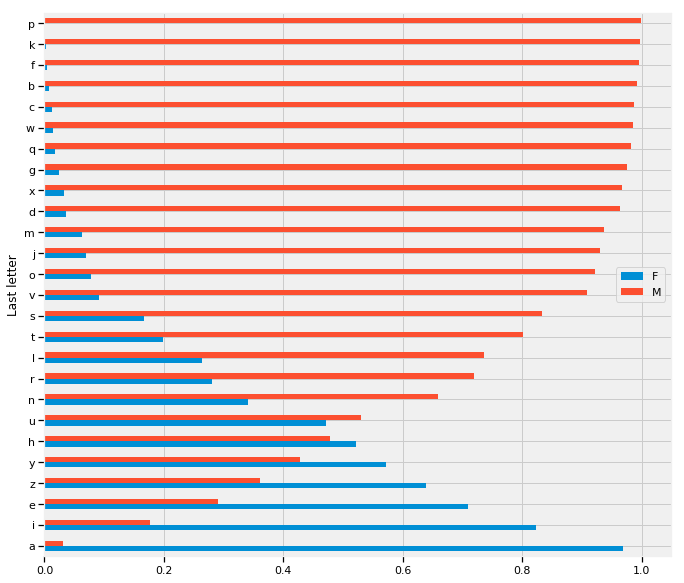

<Axes: ylabel='Last letter'>

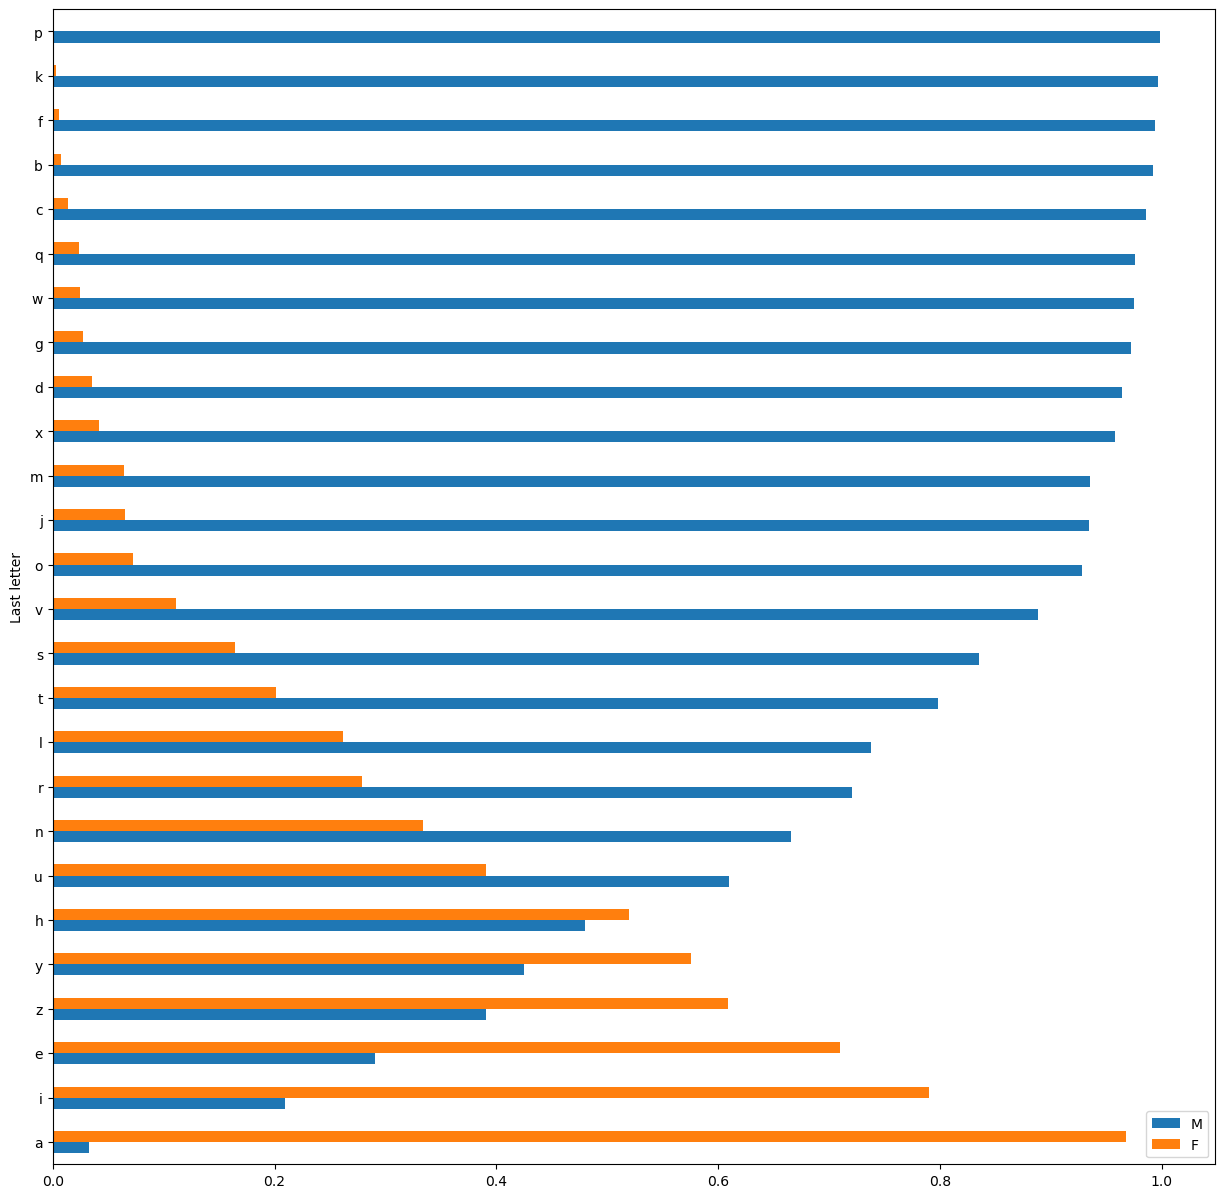

In [57]:
# your code to plot the graph as shown above (you need to consider all states, all years data)

baby_names['Last letter'] = baby_names['Name'].str[-1]
lastletter = baby_names.pivot_table(index = 'Last letter',columns='Sex',values='Count',aggfunc=sum)
total = lastletter['M'] + lastletter['F']

(pd.DataFrame({'M': lastletter['M'] / total,'F': lastletter['F']/total}).sort_values('M')).plot.barh(figsize=(15, 15))

## Activity 2.10 - Interpretation
How do you interpret the plot above? What does it tell you? Explain briefly.

# Task 3 - Cleaning and Working with Artist Data from IMDB
IMDB  https://datasets.imdbws.com/ contains large datasets such as name.basics.tsv.gz. This file is roughly 258 MB.
In order to work with these data sets, we need to clean these datasets. We have given you a file name artists.data (~50MB) that contains the data we need in a single column. In this task, we will clean this data set, extract the columns we need and do some explorations on the data.

A data row in this file is of the form <br>
nm0000001,Fred Astaire,1899,1987,soundtrack
and there are over 1 million entries in this data set.

### Activity 3.1 - Cleaning data
In this activity we need to read the data file artists.csv into a dataframe that contains 5 columns, named "ID", "Artist", "Born", "Passed" "Job" <br>
Read and print the head() of the dataframe. 

In [58]:
## your code here
df = pd.read_csv("data/artists.csv", header = None, names = ["Data"])
df[["ID", "Artist", "Born", "Passed", "Job"]] = df["Data"].str.split(",", n = 4, expand = True)
df.drop(columns = ["Data"], inplace = True)
df = df.iloc[1:]
df.head()

,ID,Artist,Born,Passed,Job
1,nm0000001,Fred Astaire,1899,1987,soundtrack
2,nm0000002,Lauren Bacall,1924,2014,actress
3,nm0000003,Brigitte Bardot,1934,\N,actress
4,nm0000004,John Belushi,1949,1982,actor
5,nm0000005,Ingmar Bergman,1918,2007,writer


### Activity 3.2 Explore this data set
1. How many artists are in this data set? <br>

2. What percentage of records have no "Job" function listed? What would you suggest you do with missing records? <br>

3. How many actors and actresses are in this data set? <br>

4. When is this data situated? That is, find a range of years for "birth" and "Passing Year". <br>

In [59]:
# write your code below to answer the questions above

# How many artists are in this data set?
print(len(df))
# What percentage of records have no "Job" function listed? 
jobless = (df["Job"] == ",N").sum()

print((jobless / len(df)) * 100)
# How many actors and actresses are in this data set?
print(len(df[df["Job"].str.contains("actor", case = False, na = False)]))
print(len(df[df["Job"].str.contains("actress", case = False, na = False)]))
# When is this data situated? That is, find a range of years for "birth" and "Passing Year".
df["Born"] = pd.to_numeric(df["Born"], errors = "coerce")
df["Passed"] = pd.to_numeric(df["Passed"], errors = "coerce")

minborn = df["Born"].min()
maxborn = df["Born"].max()
minpassed = df["Passed"].min()
maxpassed = df["Passed"].max()

print(maxborn - minborn)
print(maxpassed - minpassed)

1048575
0.0
305152
201152
2017.0
2006.0


### Activity 3.3 - Groupby jobs
If we group by the Job, how many different job titles were held by the artists? What were the 10 most popular jobs? How many in each of these jobs?

In [60]:
# your code here
job = df.groupby("Job")
size = job.size()

print(len(job))
print(size.sort_values(ascending = False).head(10))

354690
Job
actor                71974
actress              35754
producer             34082
director             31104
writer               25773
miscellaneous        20777
camera_department    20276
,\N                  18935
art_department       14514
cinematographer      12417
dtype: int64


### Activity 3.4 - Most and Least Popular first names
What are the 5 most popular first names and 5 least popular first names among artists?

In [61]:
# your code here
df["first"] = df["Artist"].str.split(" ").str[0]
count = df["first"].value_counts()

print(count.head(5))
print(count.tail(5))

John       13845
David      11075
Michael    10652
Robert      8787
Peter       6900
Name: first, dtype: int64
Navatha           1
Krishnamoorthy    1
Krishnamraju      1
Hunsur            1
Gerron            1
Name: first, dtype: int64


### Activity 3.5 - Compare with babynames
How do 5 most popular first names and 5 least popular first names among artists compare to 5 most popular first names and 5 least popular first names among babies? Use the babynames dataframe from Task 2 

In [62]:
# write your code here
newname = baby_names["Name"].value_counts()

print(count.head(5))
print(count.tail(5))
print(newname.head(5))
print(newname.tail(5))

John       13845
David      11075
Michael    10652
Robert      8787
Peter       6900
Name: first, dtype: int64
Navatha           1
Krishnamoorthy    1
Krishnamraju      1
Hunsur            1
Gerron            1
Name: first, dtype: int64
James     7465
Leslie    7428
Lee       7344
John      7271
Robert    7225
Name: Name, dtype: int64
Elona        1
Jamill       1
Ekamveer     1
Yarisbeth    1
Zondra       1
Name: Name, dtype: int64


#### Write your analysis
Briefly explain your observations below.

In [63]:
#There are some consistencies with the most popular baby names and the most popular artist names, John is the most popular combined

### Activity 3.6 - Most popular Birth Year of Artists
Which year the most artists were born according to this data? Which year the most artists passed according to this data?

In [64]:
# your code here
print(df["Born"].mode().values[0])
print(df["Passed"].mode().values[0])

1947.0
2020.0


### Activity 3.7 Ethical Considerations
Are there any ethical considerations or biases that should be taken into account when analyzing and interpreting the dataset, especially regarding cultural sensitivity and privacy concerns? This is an open ended question. Do some <b>research</b> using youchat and write a <b>brief answer</b>.

##### Write your answer below

In [65]:
#it is important to consider personal information such as birth and death of individuals, as some cultures have some beliefs and customs when it comes to these aspects

# Submission Instructions

### Please Remove all output before submission

### Submit To: cb439.cs.rutgers.edu

Warning: Failure to follow directions may result in loss of points.

## Feedback  (please edit this cell)
Please provide feedback on this lab. Thank you.
1. How would you rate this lab from a scale of 1-10 (10-best?
2. What components of the lab you enjoyed the most (if any):
3. What parts of the lab, you did not find interesting at all? (if any)
4. What other comments can you provide to improve this lab?

In [66]:
#1. 7
#2. probably the beginning, because I felt like the content was a lot easier to pick up and I was able to leanr smoothly
#3. graphing, it was a little difficult
#4. maybe these could be split into smaller tasks due weekly instead of a large one due all at once

### Rules regarding posting solutions on public sites such as github
The labs are intended **only for students** who are part of the course. As such **no lab or its solution** should be made available on a public sites such as GITHUB. Please contact the instructor for further details of this rule. Any violation of this rule may result in student being disqualified in participating in the course.


@2023 A.D. Gunawardena. Thanks to many people who proof read this lab and provided good feedback. Special thanks to Josh Hug from Berkeley Data Science Group for some of the suggested ideas for this lab. 
IMPORTANT. DO NOT post these labs in public forums such as github or others